In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from IPython.display import display
def display_matrix(m):
    display(sympy.Matrix(m))
import sympy

sympy.init_printing()

In [76]:
S0 = 100
T = 1
mu = 0.05
sigma = 0.2
lam = 1
I = 1000
m = 0
v = 0.3
paths = 10
K = 99
df = np.exp(-mu*T)

In [80]:
def matrix(paths):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0:
                M = 0
    
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix

S = matrix(paths)
S.shape

In [81]:
def drop(paths):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0 and X[i-1] > 0:
                X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
                S[i] = np.exp(X[i])
            else:
                S[i] = 0
        matrix[k] = S
    return matrix

S_drop = drop(paths)
S.shape

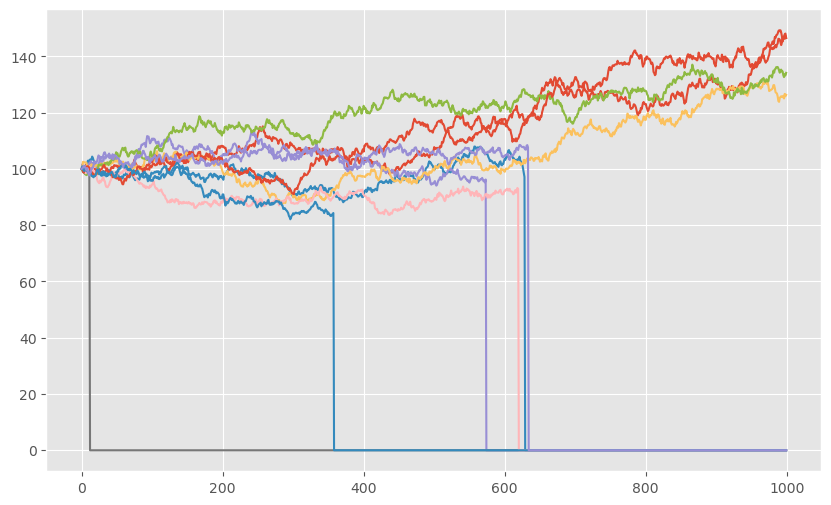

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(S_drop.T)

In [77]:
def matrix(paths, model):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))

            if N == 0:
                M = 0
            else:
                for j in range(N):
                    if model == 'zero_jump':
                        M = 0
                    else:
                        M = np.sum(np.log(Y))
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
            
        matrix[k] = S
    return matrix

S = matrix(paths, 'GBM')
S.shape

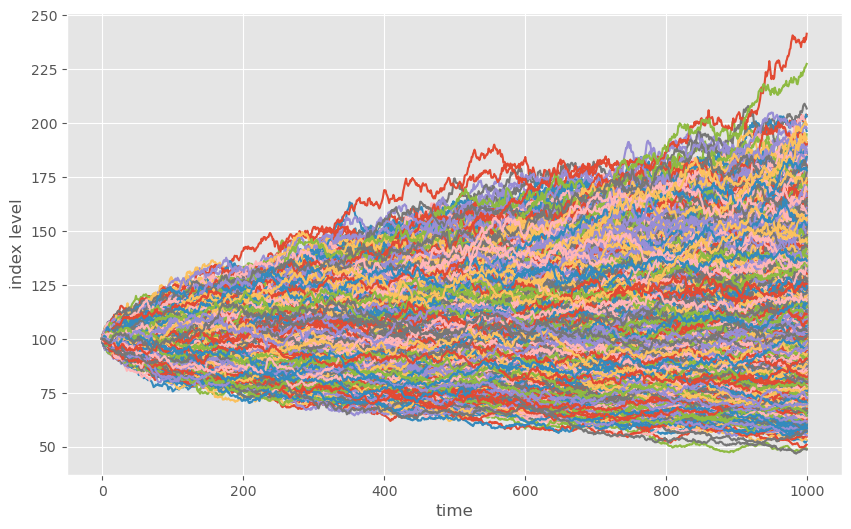

In [79]:
S = matrix(10000, 'zero_jump')
plt.figure(figsize=(10,6))
plt.plot(S.T)
plt.xlabel('time')
plt.ylabel('index level')
plt.show()


In [52]:
def matrix(paths, I, S0, T, mu, sigma, lam, m, v, model):
    np.random.seed(41)
    matrix = np.zeros((paths, I))
    
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
        if model != 'zero_jump':
            for i in range(1, I):
                Z = np.random.standard_normal()
                model_lam = 0 if model == 'GBM' else lam
                N = np.random.poisson(model_lam * dt)
                Y = np.exp(np.random.normal(m, v, N))

                if N == 0:
                    M = 0
    
                else:
                    for j in range(N):
                        M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])

        else:
            for i in range(1, I):
                Z = np.random.standard_normal()
                N = np.random.poisson(lam * dt)
                Y = np.exp(np.random.normal(m, v, N))

                if N == 0 and X[i-1]>0:
                    X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
                else:
                    X[i] == 0
            S[i] = np.exp(X[i])
        
    matrix[k] = S

    return matrix


In [54]:
matrix(2, 10, S0, T, mu, sigma, lam, m, v, 'GBM')

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.10068647]])

In [ ]:
def matrix(paths):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0:
                M = 0
    
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix

S = matrix(paths)
S.shape

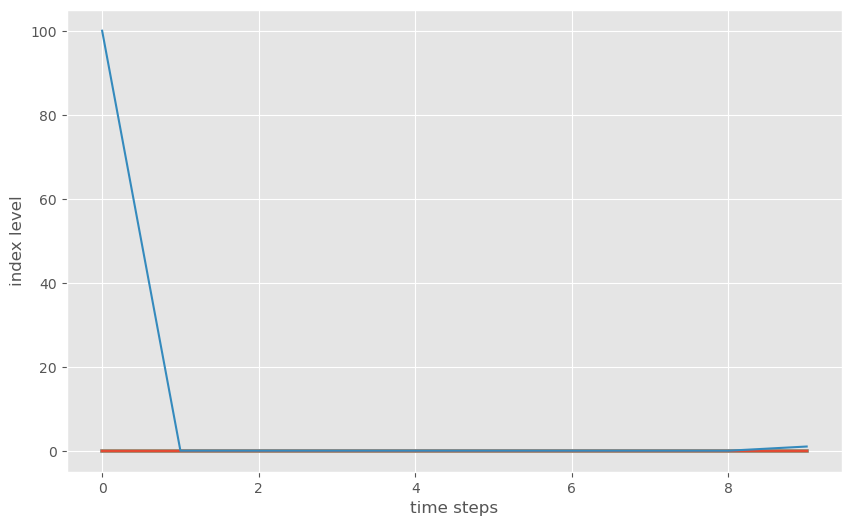

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(matrix(100, 10, S0, T, mu, sigma, lam, m, v, 'zero_jump').T)
plt.xlabel('time steps')
plt.ylabel('index level')
plt.show()

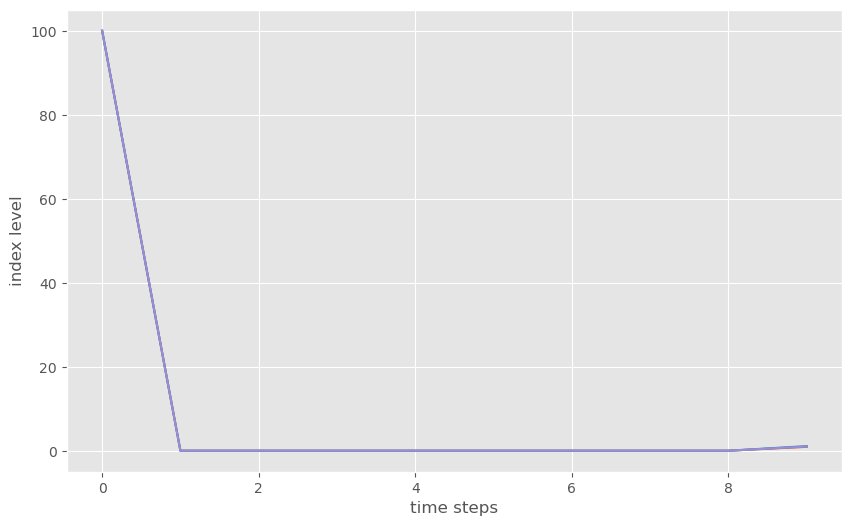

In [55]:
#plot a path for each of the models
plt.figure(figsize=(10, 6))
plt.plot(matrix(paths, I, S0, T, mu, sigma, lam, m, v, 'GBM').T[:, :10])
plt.plot(matrix(paths, I, S0, T, mu, sigma, lam, m, v, 'levy').T[:, :10])
plt.plot(matrix(paths, I, S0, T, mu, sigma, lam, m, v, 'zero_jump').T[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')
plt.show()